In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir kaggle

mkdir: cannot create directory ‘kaggle’: File exists


In [ ]:
import os
import json 
kaggleAPIToken = {"username":"minhtbi","key":"5c090ffe0e6f413dc7d7d970d54b1f76"}
with open('/content/kaggle/kaggle.json', 'w') as file:
    json.dump(kaggleAPIToken, file)

In [ ]:
!chmod 600 /content/kaggle/kaggle.json
!sudo mkdir ~/.kaggle
!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json
!mkdir dataset
!kaggle datasets download -d minhtbi/gioitinh

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mkdir: cannot create directory ‘dataset’: File exists
gioitinh.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/gioitinh.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: gioitinh/Validation/male/067031.jpg.jpg  
  inflating: gioitinh/Validation/male/067038.jpg.jpg  
  inflating: gioitinh/Validation/male/067040.jpg.jpg  
  inflating: gioitinh/Validation/male/067046.jpg.jpg  
  inflating: gioitinh/Validation/male/067048.jpg.jpg  
  inflating: gioitinh/Validation/male/067054.jpg.jpg  
  inflating: gioitinh/Validation/male/067064.jpg.jpg  
  inflating: gioitinh/Validation/male/067068.jpg.jpg  
  inflating: gioitinh/Validation/male/067069.jpg.jpg  
  inflating: gioitinh/Validation/male/067086.jpg.jpg  
  inflating: gioitinh/Validation/male/067091.jpg.jpg  
  inflating: gioitinh/Validation/male/067099.jpg.jpg  
  inflating: gioitinh/Validation/male/067101.jpg.jpg  
  inflating: gioitinh/Validation/male/067102.jpg.jpg  
  inflating: gioitinh/Validation/male/067112.jpg.jpg  
  inflating: gioitinh/Validation/male/067117.jpg.jpg  
  inflating: gioitinh/Validation/male/067119.jpg.jpg  
  inflat

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
import tensorflow.keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                shear_range = 0.2,
                zoom_range = 0.2,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                fill_mode="nearest",
                validation_split=0.15)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
trainds = train_datagen.flow_from_directory("/content/gioitinh/Training",
                                      target_size=(96,96),
                                       seed=123,
                                       batch_size=32,
                                       subset="training")
valds = train_datagen.flow_from_directory("/content/gioitinh/Training",
                                      target_size=(96,96),
                                       seed=123,
                                       batch_size=32,
                                       subset="validation")
testds = test_datagen.flow_from_directory("/content/gioitinh/Validation",
                                    target_size=(96,96),
                                    seed=123,
                                    batch_size=32,
                                    shuffle=False)

Found 39959 images belonging to 2 classes.
Found 7050 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [ ]:
c = trainds.class_indices
classes = list(c.keys())
classes

['female', 'male']

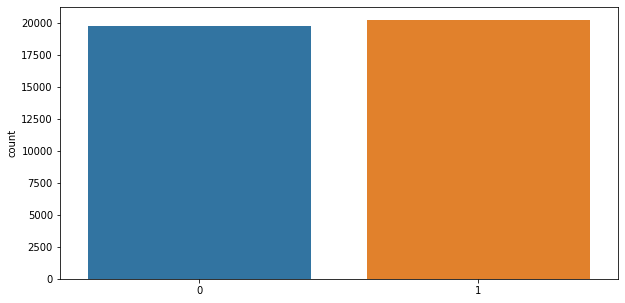

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(x=trainds.classes)

In [ ]:
x,y = next(trainds)


def plotImages(x,y):
    plt.figure(figsize=[12,8])
    for i in range(9):
        plt.subplot(4,3,i+1)
        plt.imshow(x[i])
        plt.title(classes[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

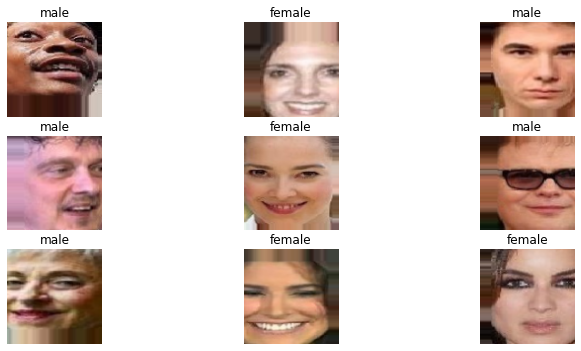

In [ ]:
plotImages(x,y)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3), activation='relu', input_shape=(96,96,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten()) 

model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 94, 94, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 47, 47, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 45, 45, 64)      

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

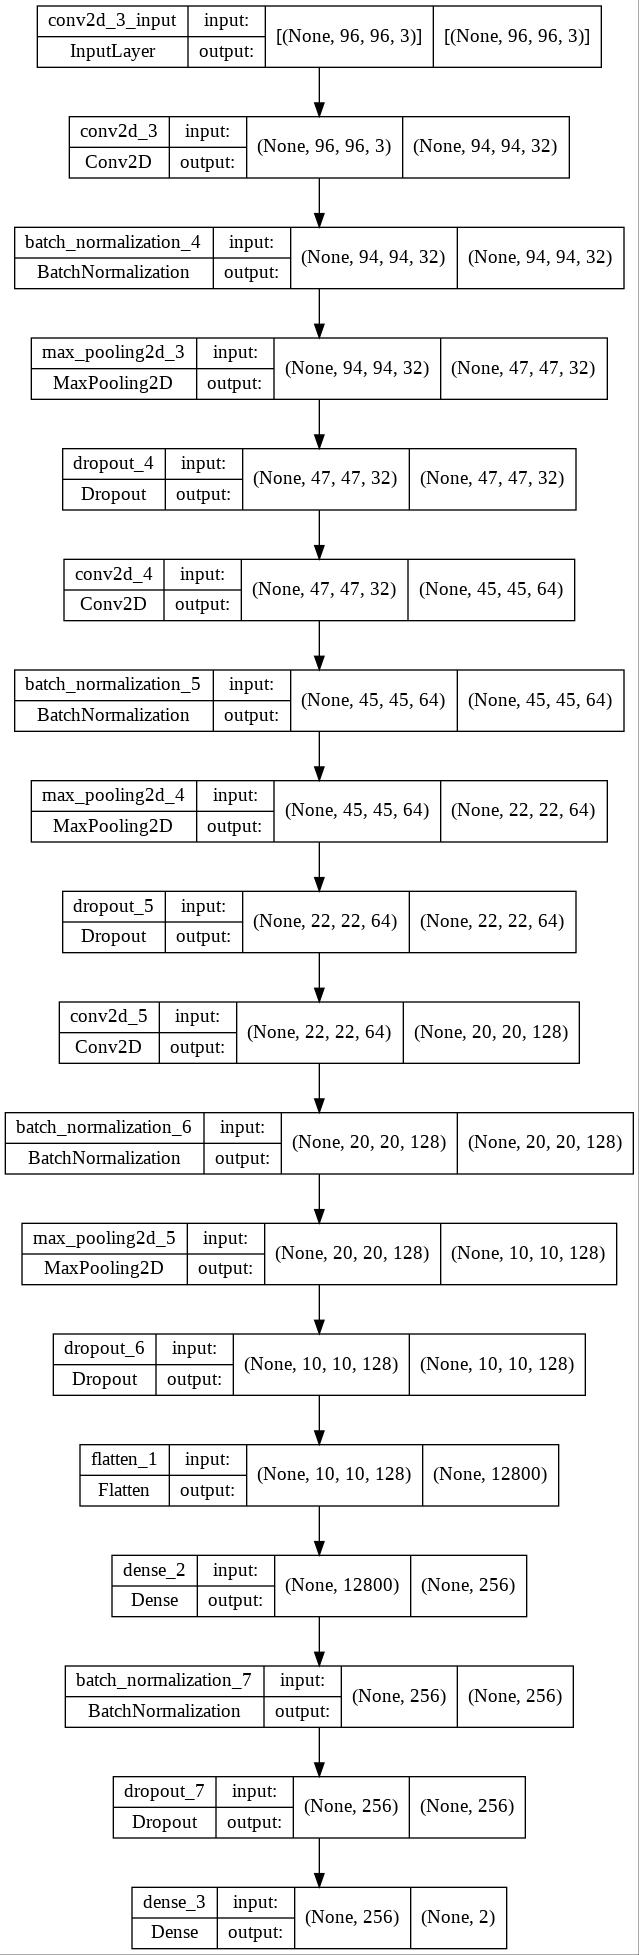

In [ ]:
tf.keras.utils.plot_model(model, 'model_gioitinh.jpg', show_shapes=True)

In [ ]:
my_calls = [EarlyStopping(monitor="val_accuracy",patience=3),
            ModelCheckpoint("Model_gioitinh.h5",verbose= 1 ,save_best_only=True)]

In [ ]:
hist = model.fit(trainds,epochs=22,validation_data=valds,callbacks=my_calls)

Epoch 1/22
1249/1249 [==============================] - ETA: 0s - loss: 0.4958 - accuracy: 0.7846
Epoch 1: val_loss improved from inf to 0.27701, saving model to Model_gioitinh.h5
1249/1249 [==============================] - 194s 154ms/step - loss: 0.4958 - accuracy: 0.7846 - val_loss: 0.2770 - val_accuracy: 0.8852
Epoch 2/22
1249/1249 [==============================] - ETA: 0s - loss: 0.2528 - accuracy: 0.8983
Epoch 2: val_loss did not improve from 0.27701
1249/1249 [==============================] - 195s 156ms/step - loss: 0.2528 - accuracy: 0.8983 - val_loss: 0.3559 - val_accuracy: 0.8223
Epoch 3/22
1249/1249 [==============================] - ETA: 0s - loss: 0.2069 - accuracy: 0.9183
Epoch 3: val_loss improved from 0.27701 to 0.17914, saving model to Model_gioitinh.h5
1249/1249 [==============================] - 198s 158ms/step - loss: 0.2069 - accuracy: 0.9183 - val_loss: 0.1791 - val_accuracy: 0.9353
Epoch 4/22
1249/1249 [==============================] - ETA: 0s - loss: 0.1952 -

In [ ]:
model.evaluate(testds)

365/365 [==============================] - 10s 28ms/step - loss: 0.1486 - accuracy: 0.9465


[0.14858989417552948, 0.9465190172195435]

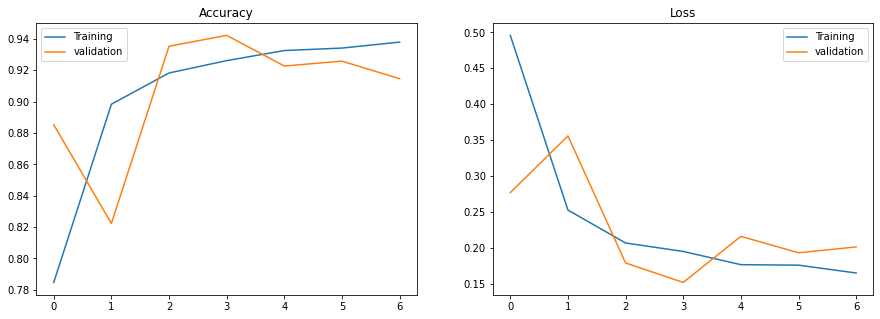

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

Classification Report
              precision    recall  f1-score   support

      female       0.91      0.99      0.95      5841
        male       0.99      0.90      0.94      5808

    accuracy                           0.95     11649
   macro avg       0.95      0.95      0.95     11649
weighted avg       0.95      0.95      0.95     11649



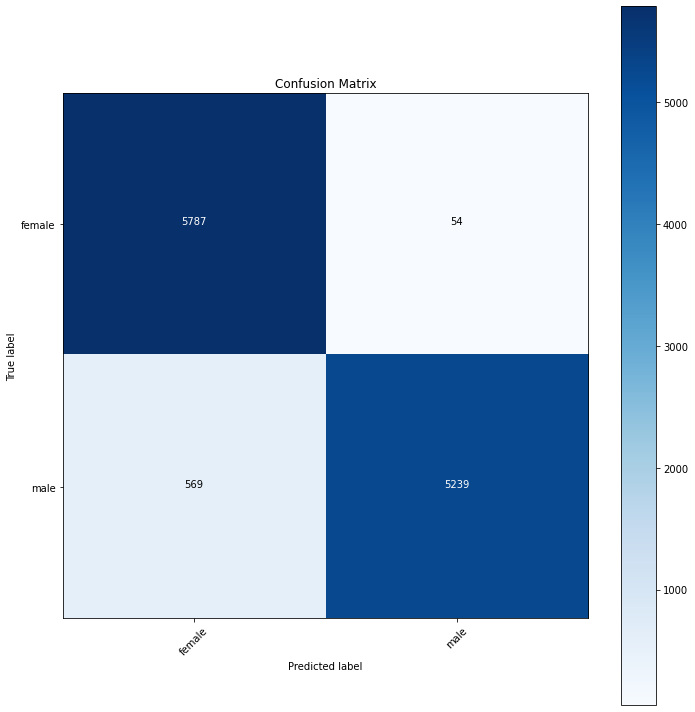

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(testds)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

# Confusion Matrix
cm = confusion_matrix(testds.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

# Classification Report
print('Classification Report')
print(classification_report(testds.classes, y_pred, target_names=target_names))